# Wisconsin Diagnostic Breast Cancer

Using Support vector Machine, we will build a model to detect wether a breast cancer is malignant or benign

## Relevant information

	Features are computed from a digitized image of a fine needle
	aspirate (FNA) of a breast mass.  They describe
	characteristics of the cell nuclei present in the image.
	A few of the images can be found at
	http://www.cs.wisc.edu/~street/images/

	Separating plane described above was obtained using
	Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
	Construction Via Linear Programming." Proceedings of the 4th
	Midwest Artificial Intelligence and Cognitive Science Society,
	pp. 97-101, 1992], a classification method which uses linear
	programming to construct a decision tree.  Relevant features
	were selected using an exhaustive search in the space of 1-4
	features and 1-3 separating planes.

	The actual linear program used to obtain the separating plane
	in the 3-dimensional space is that described in:
	[K. P. Bennett and O. L. Mangasarian: "Robust Linear
	Programming Discrimination of Two Linearly Inseparable Sets",
	Optimization Methods and Software 1, 1992, 23-34].


	This database is also available through the UW CS ftp server:

	ftp ftp.cs.wisc.edu
	cd math-prog/cpo-dataset/machine-learn/WDBC/

Number of instances: 569 

Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

## Attribute information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [1]:
# import necessary liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')

# Preprocessing the data

## Fix First row:

As seen in the picture, the dataset originally did not have the column names in it, which I have added given this:
https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

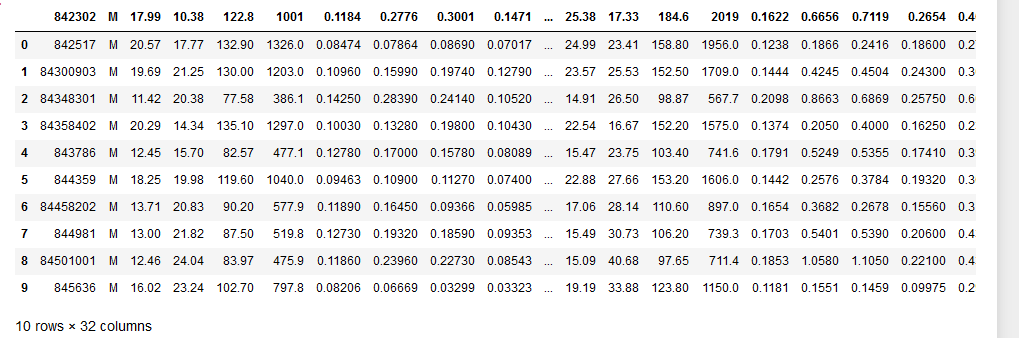

In [2]:
data=pd.read_csv("breast_table/wdbc.data")
data.head(10)

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractual_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [3]:
#Getting the shape of dataset with rows and columns
print(" rows ,columns")
print(data.shape)

 rows ,columns
(569, 32)


In [4]:
#check details about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   569 non-null    int64  
 1   Diagnosis            569 non-null    object 
 2   radius1              569 non-null    float64
 3   texture1             569 non-null    float64
 4   perimeter1           569 non-null    float64
 5   area1                569 non-null    float64
 6   smoothness1          569 non-null    float64
 7   compactness1         569 non-null    float64
 8   concavity1           569 non-null    float64
 9   concave_points1      569 non-null    float64
 10  symmetry1            569 non-null    float64
 11  fractual_dimension1  569 non-null    float64
 12  radius2              569 non-null    float64
 13  texture2             569 non-null    float64
 14  perimeter2           569 non-null    float64
 15  area2                569 non-null    flo

In [5]:
#check if data contains empty cells
data.isnull().sum().sort_values(ascending=False)/data.shape[0]

ID                     0.0
Diagnosis              0.0
symmetry3              0.0
concave_points3        0.0
concavity3             0.0
compactness3           0.0
smoothness3            0.0
area3                  0.0
perimeter3             0.0
texture3               0.0
radius3                0.0
fractual_dimension2    0.0
symmetry2              0.0
concave_points2        0.0
concavity2             0.0
compactness2           0.0
smoothness2            0.0
area2                  0.0
perimeter2             0.0
texture2               0.0
radius2                0.0
fractual_dimension1    0.0
symmetry1              0.0
concave_points1        0.0
concavity1             0.0
compactness1           0.0
smoothness1            0.0
area1                  0.0
perimeter1             0.0
texture1               0.0
radius1                0.0
fractual_dimension3    0.0
dtype: float64

No Data missing: No work required here.

In [6]:
#Checking for Duplicates
value=len(data[data.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


No duplicates: No work required here.

In [7]:
data['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

## Dropping unnecessary categories:

the dataset contains the column ID, which doesn't affect the diagnosis.

In [8]:
data = data.drop(['ID'], axis=1)
data.head()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractual_dimension3
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius1,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture1,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter1,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area1,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness1,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness1,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity1,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points1,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry1,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractual_dimension1,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


The Diagnosis is currently noted down in M or B. To be able to work with, we will have to change those to a numerical.
0 will from now on represent M, 1 is B.

In [10]:
#Change Diagnosis to a numerical value
data['Diagnosis'] = pd.factorize(data['Diagnosis'])[0]
data.tail()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractual_dimension3
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,1,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [11]:
#change dtype accordingly
cols=['Diagnosis', 'Diagnosis']
for col in cols:
  data[col]=data[col].astype('int64')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Diagnosis            569 non-null    int64  
 1   radius1              569 non-null    float64
 2   texture1             569 non-null    float64
 3   perimeter1           569 non-null    float64
 4   area1                569 non-null    float64
 5   smoothness1          569 non-null    float64
 6   compactness1         569 non-null    float64
 7   concavity1           569 non-null    float64
 8   concave_points1      569 non-null    float64
 9   symmetry1            569 non-null    float64
 10  fractual_dimension1  569 non-null    float64
 11  radius2              569 non-null    float64
 12  texture2             569 non-null    float64
 13  perimeter2           569 non-null    float64
 14  area2                569 non-null    float64
 15  smoothness2          569 non-null    flo

<AxesSubplot:>

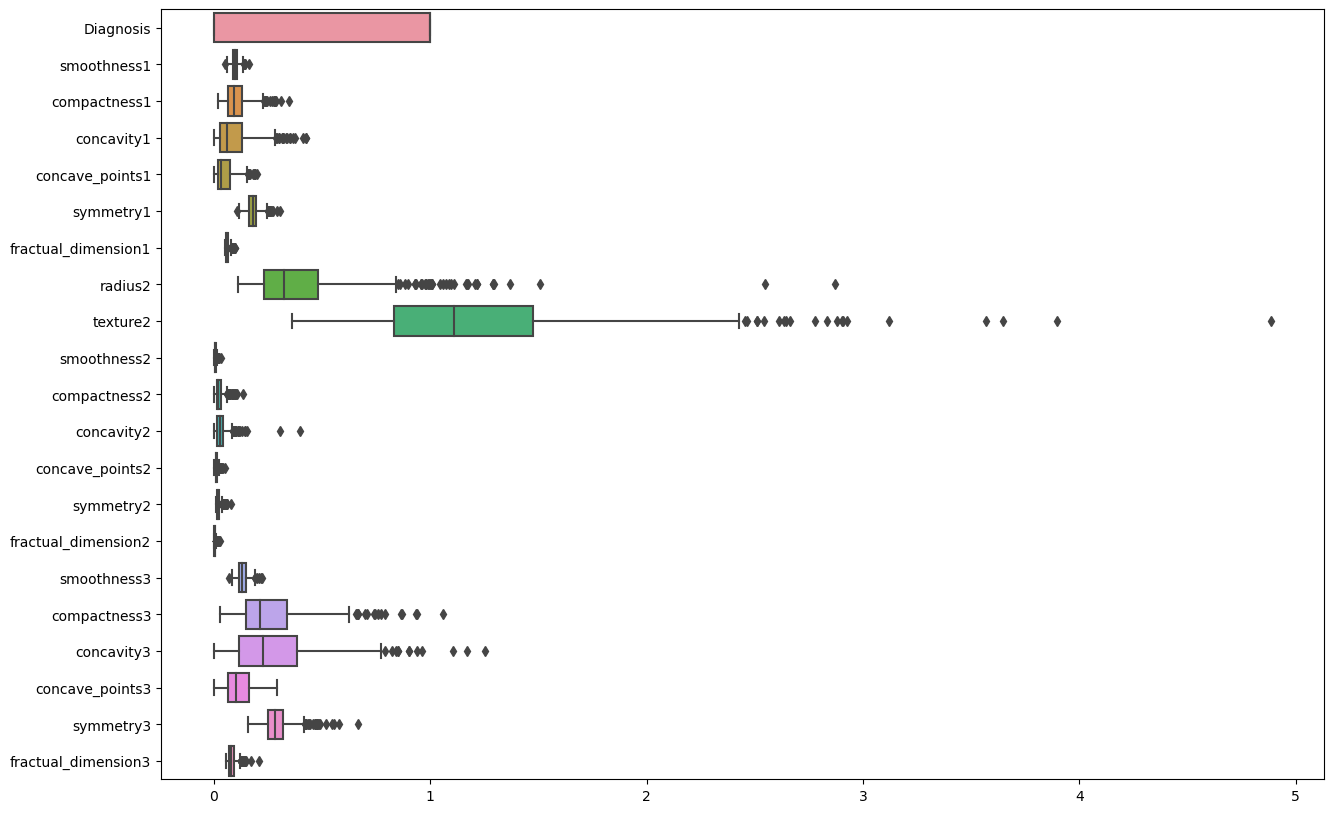

In [13]:
plt.figure(figsize=(15,10))
dataplt = data.drop(["area1", "area2", "area3", "perimeter1", "perimeter2", "perimeter3", "radius1", "radius3", "texture1", "texture3"], axis=1)
sns.boxplot(data=dataplt, orient="h")

<AxesSubplot:>

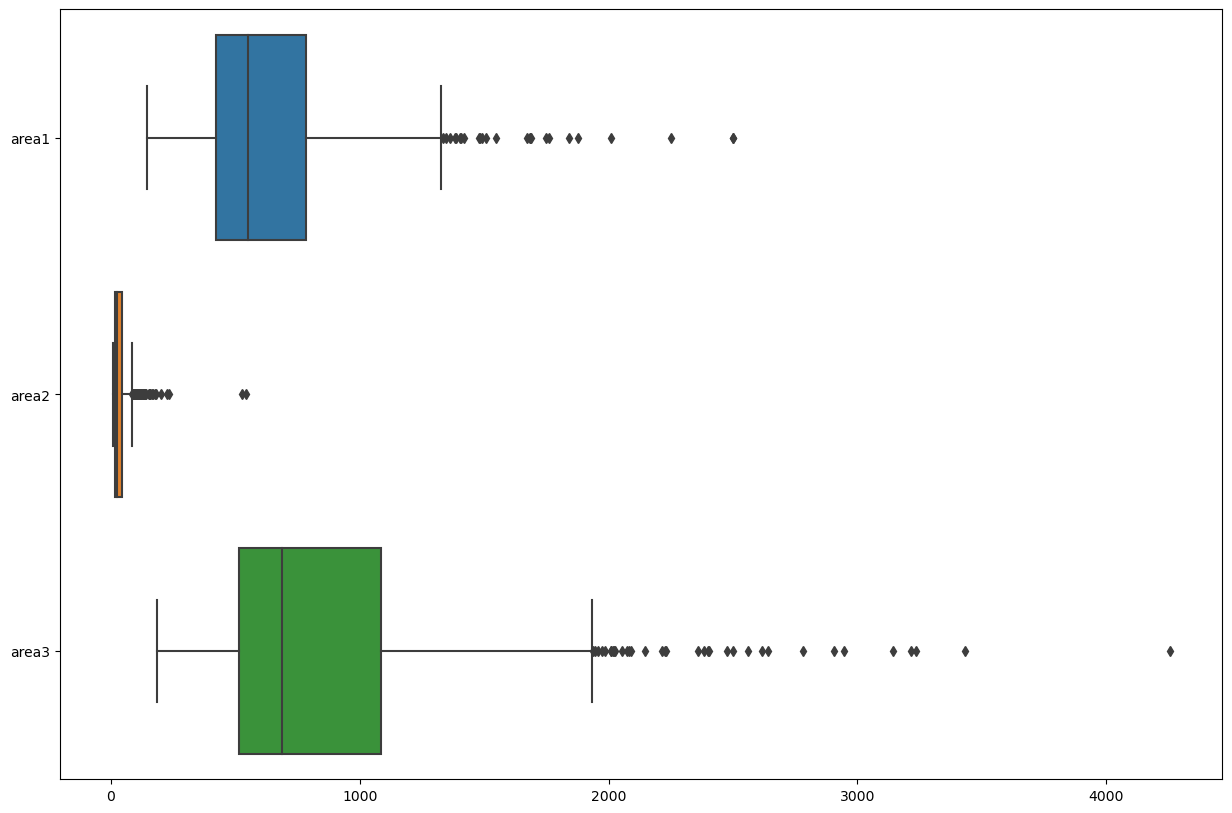

In [14]:
plt.figure(figsize=(15,10))
dataplt = data[["area1", "area2", "area3"]]
sns.boxplot(data=dataplt, orient="h")

<AxesSubplot:>

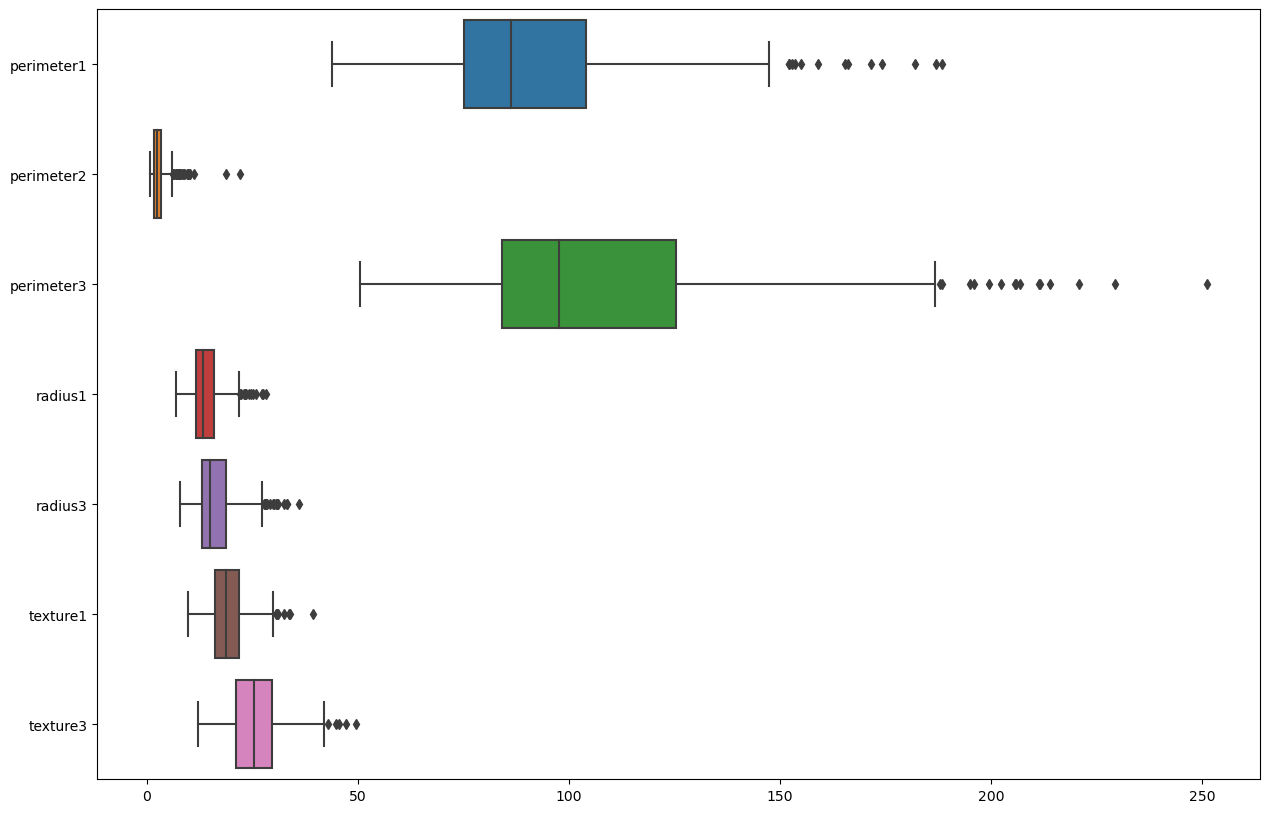

In [15]:
plt.figure(figsize=(15,10))
dataplt = data[["perimeter1", "perimeter2", "perimeter3","radius1", "radius3", "texture1", "texture3"]]
sns.boxplot(data=dataplt, orient="h")

<AxesSubplot:>

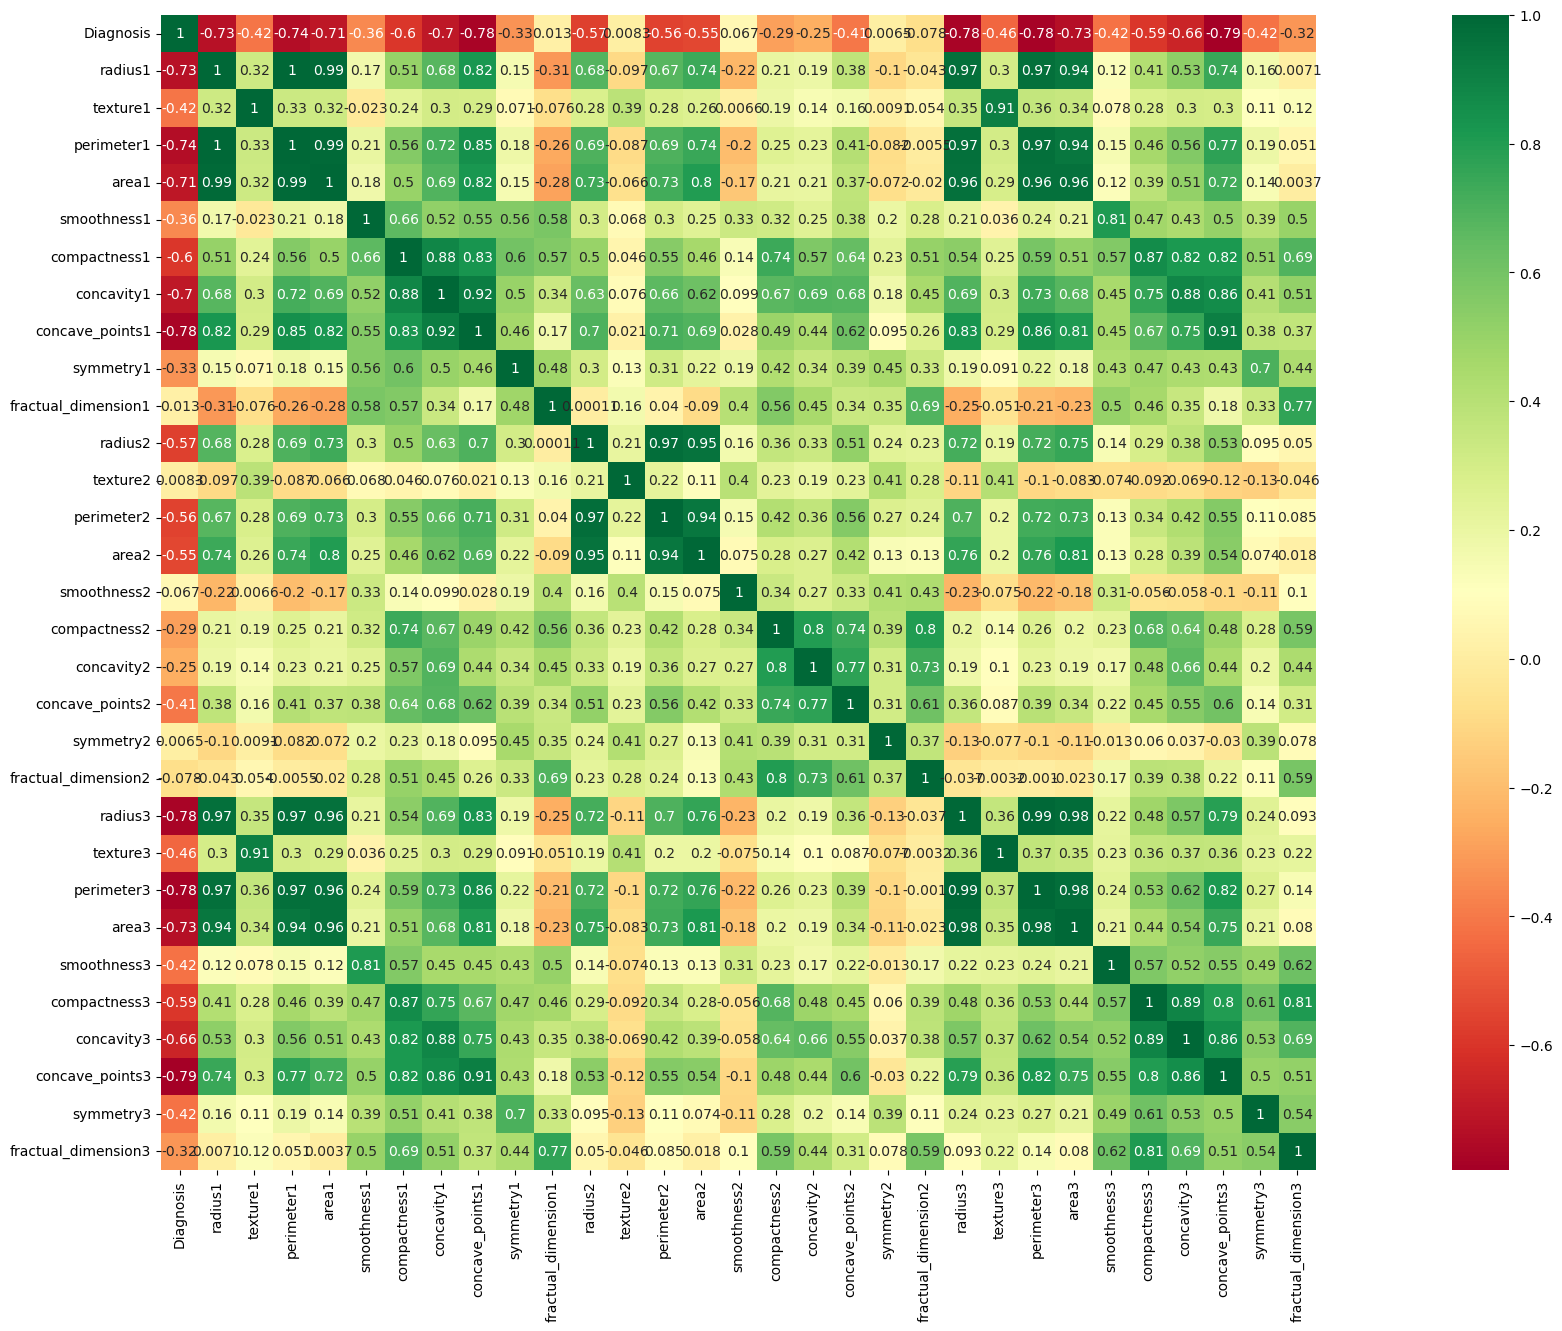

In [16]:
# Data visualisation 
# Building the correlation matrix

plt.figure(figsize=(35,15))
sns.heatmap(data.corr(), vmax=1, square=True, annot=True,cmap='RdYlGn')

Clearly a lot of high correlation here. Some attributes can be dropped to decrease complexity

In [17]:
data = data.drop(["perimeter1", "area1", "perimeter3", "area3"], axis=1)

<AxesSubplot:>

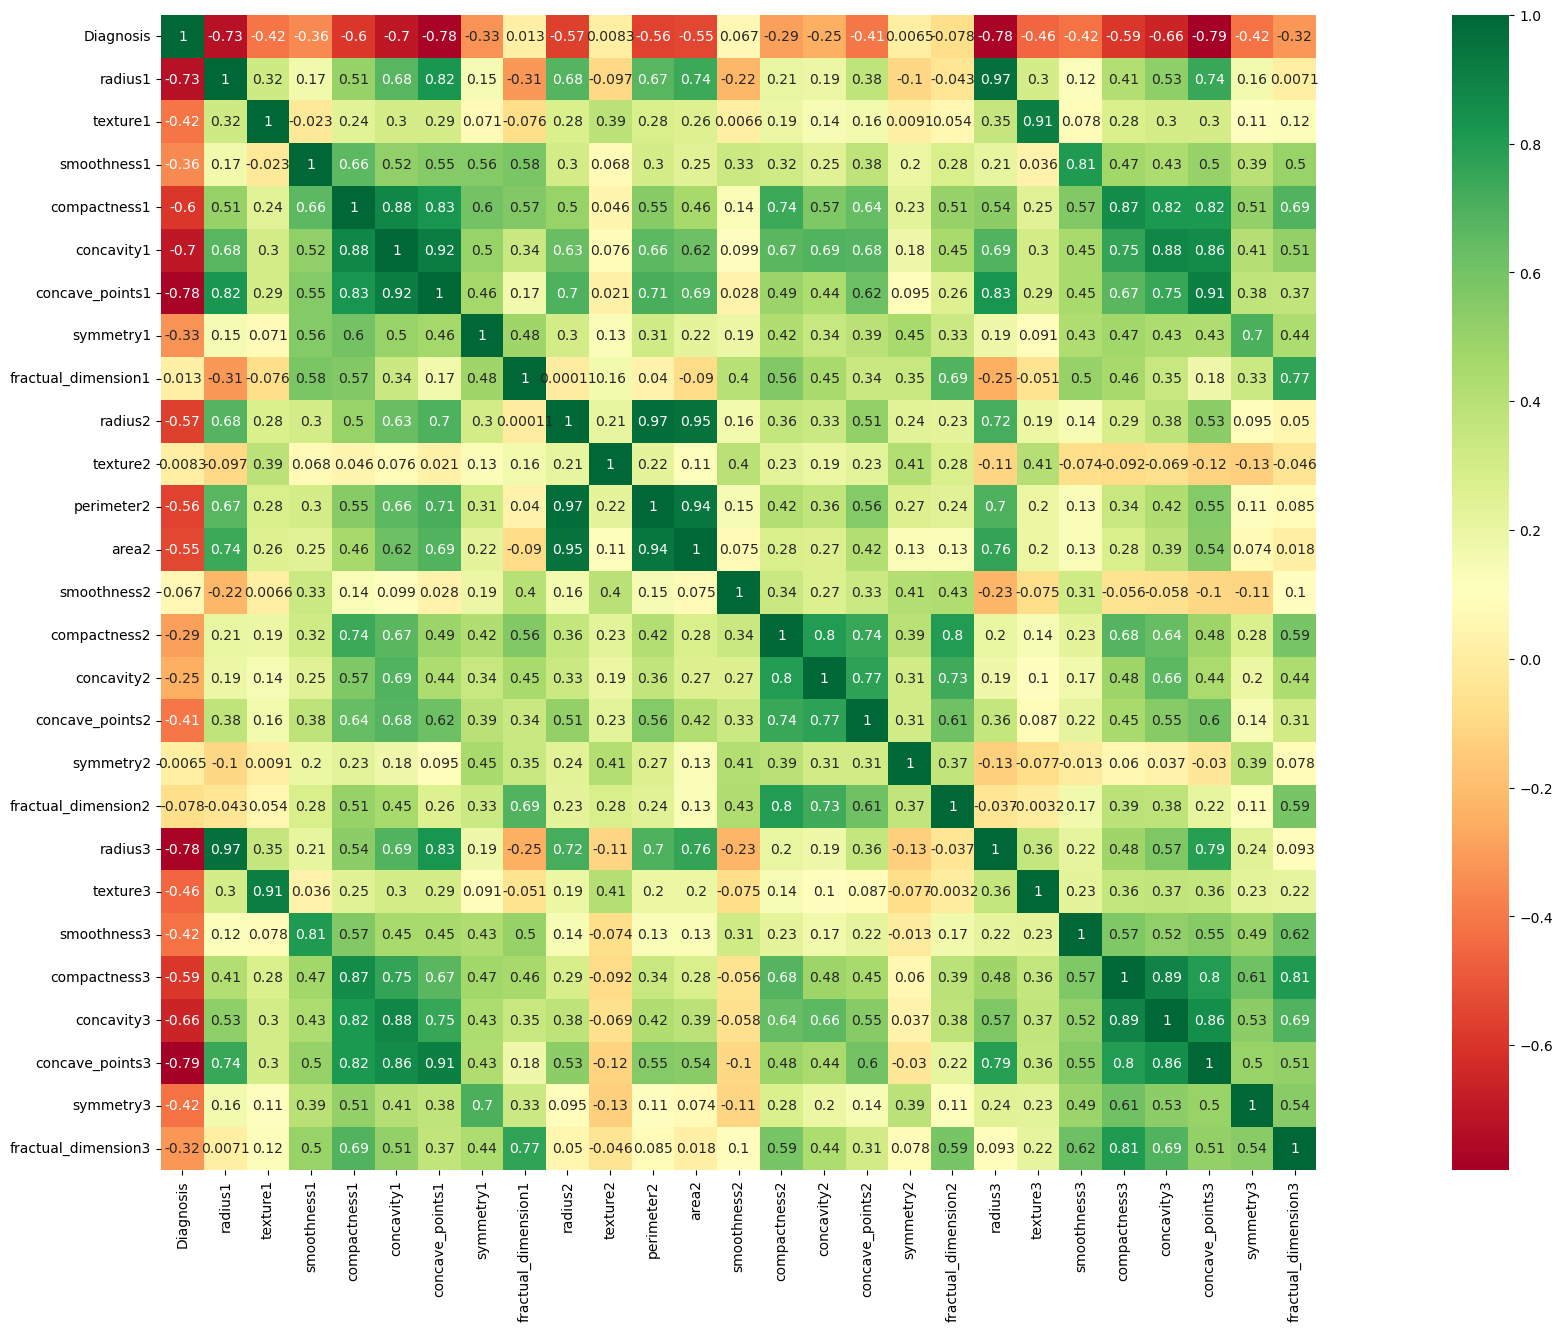

In [18]:
plt.figure(figsize=(35,15))
sns.heatmap(data.corr(), vmax=1, square=True, annot=True,cmap='RdYlGn')

# Model training

In [19]:
data.tail()

,Diagnosis,radius1,texture1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractual_dimension1,radius2,...,symmetry2,fractual_dimension2,radius3,texture3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractual_dimension3
564,0,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,0.01114,0.004239,25.450,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,0.01898,0.002498,23.690,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,0.01318,0.003892,18.980,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,0.02324,0.006185,25.740,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,1,7.76,24.54,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,...,0.02676,0.002783,9.456,30.37,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [20]:
#assign values to x and y
x=data.drop(["Diagnosis"], axis=1)
y=data["Diagnosis"]

In [21]:
#split data into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
#train using svc
svc=SVC()
svc.fit(X_train, y_train)

SVC()

In [23]:
#Run training
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [24]:
#Evaluting the model
from scipy.stats import zscore
print("Result of training data:", svc.score(X_train, y_train))
print("Result of testing data:", svc.score(X_test, y_test))

Result of training data: 0.9010989010989011
Result of testing data: 0.9473684210526315


In [25]:
from sklearn.metrics import classification_report

In [27]:
print("Classification for train data")
print(classification_report(y_train,y_pred_train))

Classification for train data
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       169
           1       0.89      0.97      0.92       286

    accuracy                           0.90       455
   macro avg       0.91      0.88      0.89       455
weighted avg       0.90      0.90      0.90       455



In [26]:
print("Classification for test data")
print(classification_report(y_test,y_pred_test))

Classification for test data
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



# K-fold cross Validation

In [35]:
#Confirm our result by cross Validation
from sklearn.model_selection import KFold
from sklearn import metrics, svm
kf = KFold(n_splits = 10, random_state = 42, shuffle = True)

X_array = x.to_numpy()

data_split_object = kf.split(X_array, y)
split_data = next(data_split_object)

pred_y = []
act_y = []

for train_index, test_index in kf.split(X_array, y):
    x_train, x_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #train this fold
    fold = svm.SVC(C=1, random_state=42)
    fold.fit(x_train, y_train)
    
    # accuracy for each fold
    predicted_this_fold = fold.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, predicted_this_fold)
    print("Accuracy from this fold: " + accuracy.__str__())

    # store the prediction
    pred_y.extend(predicted_this_fold)

    # store the ground truth
    act_y.extend(y_test)
    
# print accuracy
accuracy = metrics.accuracy_score(act_y, pred_y)
print('\n',"Accuracy from all folds: " + accuracy.__str__())

Accuracy from this fold: 0.9824561403508771
Accuracy from this fold: 0.9122807017543859
Accuracy from this fold: 0.9122807017543859
Accuracy from this fold: 0.9473684210526315
Accuracy from this fold: 0.8245614035087719
Accuracy from this fold: 0.9122807017543859
Accuracy from this fold: 0.9824561403508771
Accuracy from this fold: 0.8947368421052632
Accuracy from this fold: 0.8421052631578947
Accuracy from this fold: 0.8571428571428571

 Accuracy from all folds: 0.9068541300527241


# Conclusion:
A good result, being able to correctly predict the type of cancer in most cases and not far of the in the documentation mentioned best of 97% using SVM.